In [1]:
#Data Mining Course Homework 2 - Mustafa Nazlıer- 15050111035 

### Plotting our data with the outliers

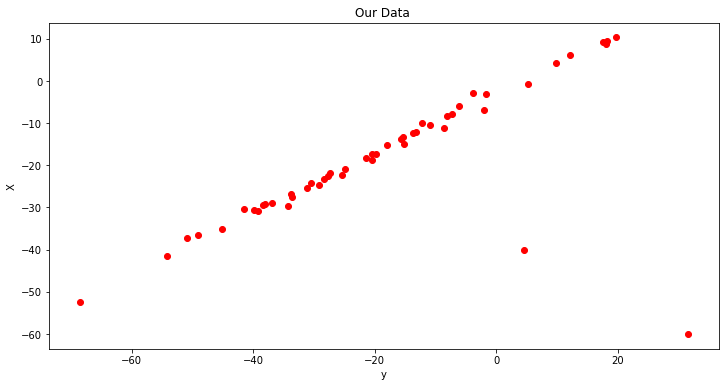

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('data.csv' , header=0 , sep=',') #header= 0 to not including first line (x,y) as data
X= df.iloc[:,0:1].values #first column is for x's 
y= df.iloc[:,1:2].values #second column is for y's

plt.figure(figsize=(12, 6))   
plt.plot(X, y, 'ro')       
plt.title('Our Data ')
plt.xlabel('y')
plt.ylabel('X')
plt.show()

### Fitting the line using the data inside the csv file and show the data with the outliers

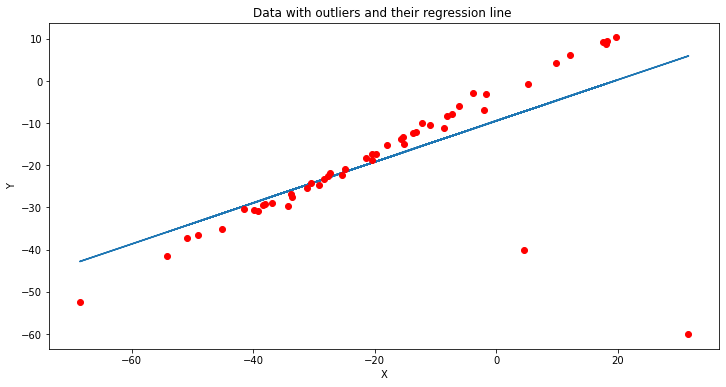

In [3]:



from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X, y)
pred =model.predict(X)                       #fitting and predicting the data

plt.figure(figsize=(12, 6))
plt.plot(X, pred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Data with outliers and their regression line ')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()



### Calculating the distance between the each dot and the line, then adding all of them as a new column in our dataframe

In [4]:
df["Distance"] = abs(y - pred)  #add third column as 'Distance'
print(df)              #we are finding the distance between eachpoint and the line 


          x         y   Distance
0  -54.1890 -41.58700   5.771111
1  -45.0970 -35.04000   3.648197
2  -33.6750 -27.45700   1.623040
3  -15.2220 -14.90400   1.950895
4   -7.3334  -7.84100   5.175372
5  -39.1990 -30.73800   2.216111
6  -50.8560 -37.26300   3.068919
7  -24.9660 -20.90700   0.689238
8  -49.1840 -36.55500   3.174499
9  -19.7930 -17.36700   1.712102
10 -38.1290 -29.23900   1.237764
11  -6.1060  -6.04380   6.375330
12 -27.7810 -22.63200   0.333992
13 -13.6720 -12.35300   3.747678
14 -34.2990 -29.64300   3.505407
15  19.6990  10.31800  10.180648
16 -13.2820 -12.09800   3.812908
17 -20.5380 -17.26600   2.175613
18 -41.5310 -30.40900   0.752381
19  -8.1969  -8.39720   5.039344
20 -36.8890 -28.82400   1.426137
21 -38.3540 -29.32600   1.215281
22 -29.1470 -24.69500   1.064325
23 -28.3050 -23.28100   0.060034
24 -27.4430 -21.71300   1.088524
25  18.2120   9.51550  10.101709
26  -2.0371  -6.81980   3.619440
27  12.1250   6.21050   9.758589
28 -68.5810 -52.37500   9.556092
29 -20.532

,x,y,Distance
count,50.0,50.0,50.0
mean,-18.5,-18.5,5.6
std,21.5,15.6,10.1
min,-68.6,-60.0,0.0
25%,-33.8,-29.1,1.3
50%,-20.2,-18.4,3.3
75%,-6.4,-8.8,6.1
max,31.6,10.3,65.9


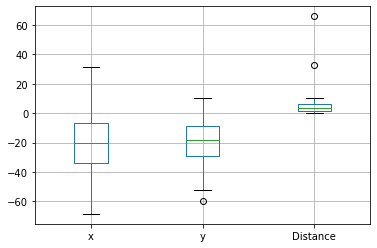

In [12]:
pd.options.display.float_format = '{:.1f}'.format # getting only the first float point to display

df.boxplot(return_type='dict')

df.describe() #With this, we can see the Q1 and Q3 of the Distance values and interpret them to obtain IQR

### Using Tukey method to find outliers on squared residual distances  

In [6]:
Q1 = 1.3  #from the describe() of the Distance column
Q3 = 6.1  #from the describe() of the Distance column
IQR = Q3-Q1
                
LowerBound= Q1-3*IQR           #finding the  range for the distance    
UpperBound= Q3+3*IQR           # Using 3 instead of 1.5 in the formulas    


print(LowerBound)
print(UpperBound)


-13.099999999999998
20.5


### Creating df_new for the outlier_free data and df_outliers for to contain the removed outlier data

In [7]:
df_new = df[df['Distance'] <=UpperBound ] #Our new dataset
df_outliers = df[df['Distance'] >= UpperBound ]

#we did not drop the values with the lowerbound because all of our distance values is bigger than '0' (hence bigger than -13.05) 
#as it should be



### Creating the necessary variables for plotting our outlier_free data and the removed outliers
### Fitting the outlier free data
### Fitting a line without the outliers 
### Fitting the outlier data to show on the graph as red marks
### Plotting the final graph

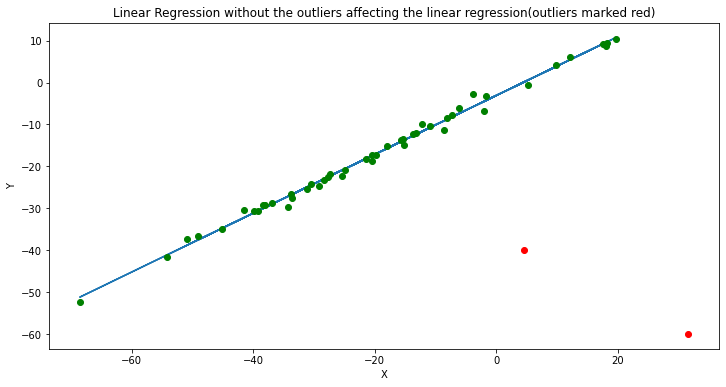

In [8]:
X_new= df_new.iloc[:,0:1].values #X_new and y_new variable for our outlier removed dataframe
y_new= df_new.iloc[:,1:2].values 

X_outliers= df_outliers.iloc[:,0:1].values #X_outliers and y_outliers variables for our detected outlier data 
y_outliers= df_outliers.iloc[:,1:2].values 



lm = LinearRegression()
model = lm.fit(X_new, y_new)    #firsly fitting the outlier removed data
pred_new =model.predict(X_new)  #predicting a better line without the outliers
model = lm.fit(X_outliers, y_outliers) #adding our outliers to show them in the graph


plt.figure(figsize=(12, 6)) 
plt.plot(X_new, pred_new)     # plotting the line that was predicted without the outliers
plt.plot(X_new, y_new, 'go')   # plotting the outlier-free data in green dots
plt.plot(X_outliers, y_outliers, 'ro') # plotting the detected outliers in red 

plt.title('Linear Regression without the outliers affecting the linear regression(outliers marked red)')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

